Notebook Colors:


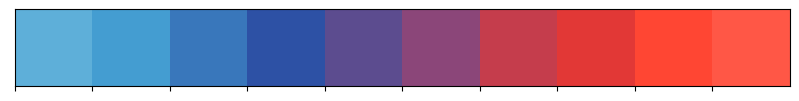

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score

class clr:
    S = '\033[1m' + '\033[92m'
    E = '\033[0m'
    
    
my_colors = ["#5EAFD9", "#449DD1", "#3977BB", 
             "#2D51A5", "#5C4C8F", "#8B4679",
             "#C53D4C", "#E23836", "#FF4633", "#FF5746"]

print(clr.S+"Notebook Colors:"+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

In [76]:
!pip install openpyxl

In [77]:
train_data = pd.read_csv('/kaggle/input/developers-day-2023-data-science-competition/train.csv')
test_data = pd.read_csv('/kaggle/input/developers-day-2023-data-science-competition/test.csv')

* Now we check how many features we have in train and test dataset.

In [78]:
# Printing the Shape of the Train and Tet data to find data's instances and features.

print(f'The Shpae of the Train data : {train_data.shape}')
print(f'The Shpae of the Test data : {test_data.shape}')

The Shpae of the Train data : (79999, 28)
The Shpae of the Test data : (20001, 27)


In [79]:
def get_csv(df, name):
    print(clr.S+f" ====== {name} ======="+clr.E)
    print(clr.S+f"No of Nan Values in {name}.csv data: "+clr.E,df.isnull().sum().sum())
    print("\n")
    print(clr.S+"Features: "+clr.E, df.columns)
    print("\n\n")
    
    display(df.head())

In [80]:
get_csv(train_data, 'Train')

 ====== Train =======
No of Nan Values in Train.csv data:  47892


Features:  Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')





,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


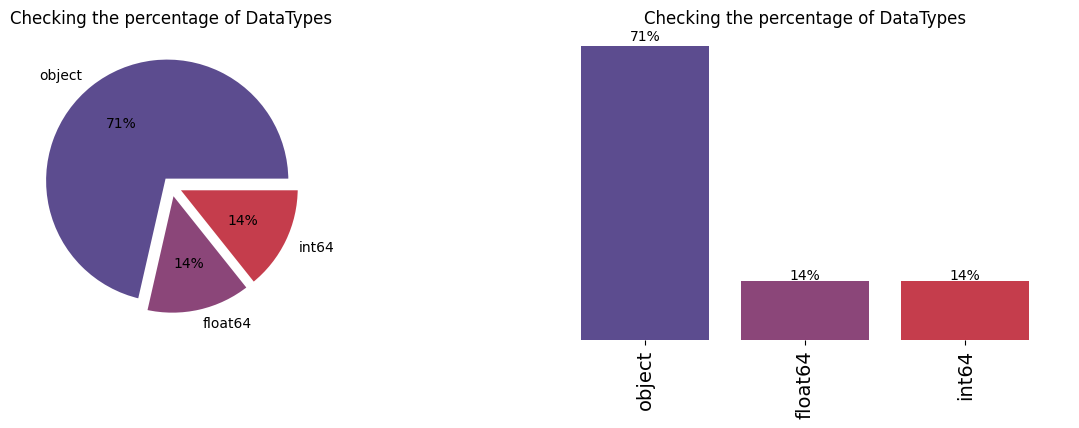

In [81]:
result=train_data.dtypes.value_counts(normalize=True)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('Checking the percentage of DataTypes')
result.plot(kind='pie',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=[my_colors[4],my_colors[5],my_colors[6]], autopct="%.0f%%",explode = (0.05, 0.05, 0.05))
plt.subplot(1,2,2)
plt.title('Checking the percentage of DataTypes')
ax = result.plot(kind='bar',figsize=(15,4),width = 0.8,color=[my_colors[4],my_colors[5],my_colors[6]],edgecolor=None)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
plt.show()

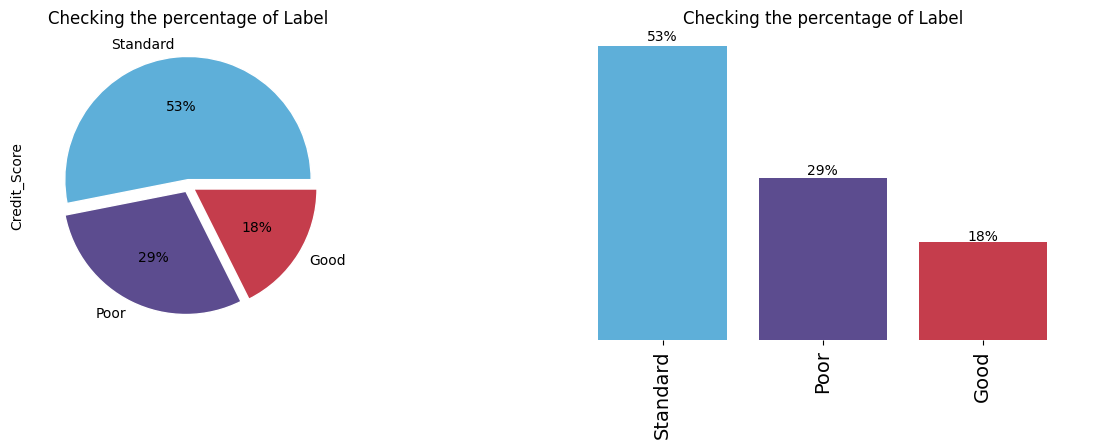

In [82]:
result=train_data['Credit_Score'].value_counts(normalize=True)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('Checking the percentage of Label')
result.plot(kind='pie',wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },colors=[my_colors[0],my_colors[4],my_colors[6]], autopct="%.0f%%",explode = (0.05, 0.05, 0.05))
plt.subplot(1,2,2)
plt.title('Checking the percentage of Label')
ax = result.plot(kind='bar',figsize=(15,4),width = 0.8,color=[my_colors[0],my_colors[4],my_colors[6]],edgecolor=None)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
plt.show()

<Figure size 1000x600 with 0 Axes>

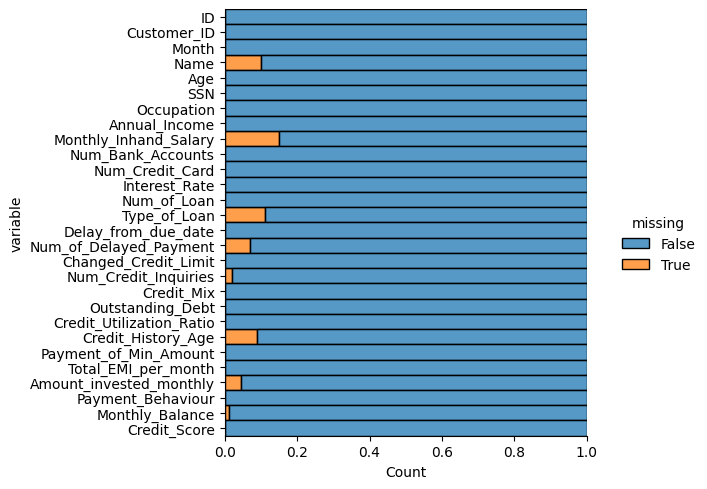

In [83]:
plt.figure(figsize=(10,6))
sns.displot(
    data=train_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [84]:
print(clr.S+"Percentage of Nan columns in Train data "+clr.E)
round(train_data.isnull().sum() / len(train_data) * 100,2)

Percentage of Nan columns in Train data 


ID                           0.00
Customer_ID                  0.00
Month                        0.00
Name                        10.02
Age                          0.00
SSN                          0.00
Occupation                   0.00
Annual_Income                0.00
Monthly_Inhand_Salary       14.97
Num_Bank_Accounts            0.00
Num_Credit_Card              0.00
Interest_Rate                0.00
Num_of_Loan                  0.00
Type_of_Loan                11.27
Delay_from_due_date          0.00
Num_of_Delayed_Payment       6.93
Changed_Credit_Limit         0.00
Num_Credit_Inquiries         1.94
Credit_Mix                   0.00
Outstanding_Debt             0.00
Credit_Utilization_Ratio     0.00
Credit_History_Age           9.06
Payment_of_Min_Amount        0.00
Total_EMI_per_month          0.00
Amount_invested_monthly      4.48
Payment_Behaviour            0.00
Monthly_Balance              1.20
Credit_Score                 0.00
dtype: float64

In [85]:
print(clr.S+'INFO:'+clr.E)
display(train_data.info())

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79999 entries, 0 to 79998
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        79999 non-null  object 
 1   Customer_ID               79999 non-null  object 
 2   Month                     79999 non-null  object 
 3   Name                      71987 non-null  object 
 4   Age                       79999 non-null  object 
 5   SSN                       79999 non-null  object 
 6   Occupation                79999 non-null  object 
 7   Annual_Income             79999 non-null  object 
 8   Monthly_Inhand_Salary     68023 non-null  float64
 9   Num_Bank_Accounts         79999 non-null  int64  
 10  Num_Credit_Card           79999 non-null  int64  
 11  Interest_Rate             79999 non-null  int64  
 12  Num_of_Loan               79999 non-null  object 
 13  Type_of_Loan              70983 non-null  object 
 14  

None

### **Interpretation** ✍:

* Now we have multiple object features and multiple float and int features, we also have Nan data in the dataset. So, first we divide the dataset into numerical and categorical, then we individually perform eda and cleaning on them and at last merge them.

In [86]:
num_val = train_data.select_dtypes(exclude=['object']).copy()
cat_val = train_data.select_dtypes(include=['object']).copy()

<AxesSubplot: title={'center': 'Counting Nan in different columns of Categorical Part'}, xlabel='Count', ylabel='Columns'>

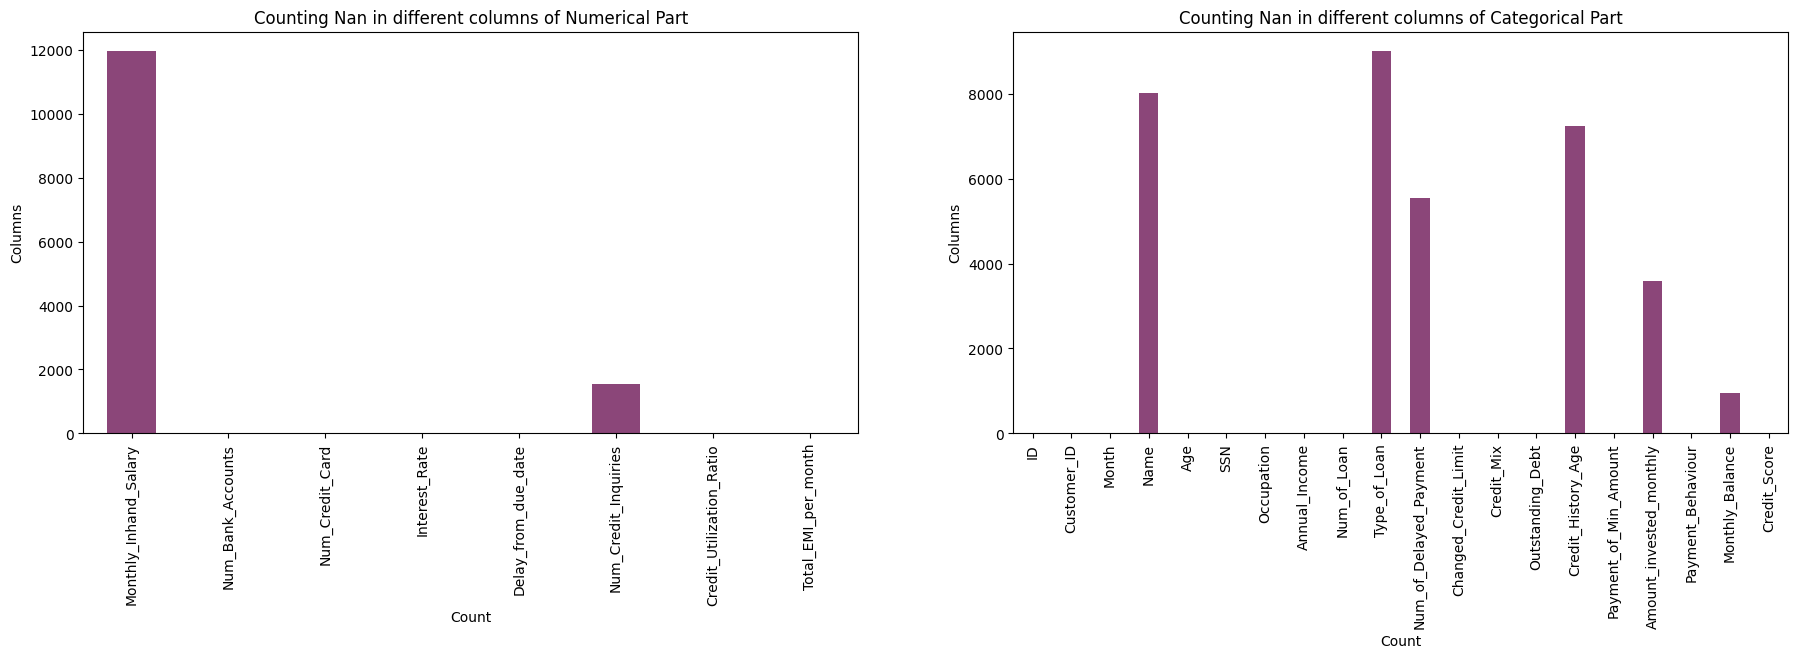

In [87]:
plt.figure(figsize=(22,24))
plt.subplot(4,2,1)
plt.xlabel('Count')
plt.ylabel('Columns')
plt.title('Counting Nan in different columns of Numerical Part')
num_val.isnull().sum().plot(kind='bar',color=my_colors[5])
plt.subplot(4,2,2)
plt.xlabel('Count')
plt.ylabel('Columns')
plt.title('Counting Nan in different columns of Categorical Part')
cat_val.isnull().sum().plot(kind='bar',color=my_colors[5])

In [88]:
def make_missing_columns(df):
    columns = [col for col in df.columns if df.loc[:,col].isnull().sum()!=0]
    for col in columns:
        df[col+'_missing'] = np.where(df[col].isna() == True,1,0)
        
    return df

train_data = make_missing_columns(train_data)
test_data = make_missing_columns(test_data)

In [89]:
nan_num_col = [col for col in num_val.columns if num_val.loc[:,col].isnull().sum()!=0]
cat_num_col = [col for col in cat_val.columns if cat_val.loc[:,col].isnull().sum()!=0]

In [90]:
for col in nan_num_col:
    train_data[col].fillna(train_data[col].median(),inplace=True) # We have too many outliers that's why using median
    test_data[col].fillna(test_data[col].median(),inplace=True)
    
for col in cat_num_col:
    train_data[col].fillna(train_data[col].value_counts().index[0], inplace=True)   # Filling the missing value with most frequent data 
    test_data[col].fillna(test_data[col].value_counts().index[0], inplace=True)
    

In [91]:
print(clr.S+"Train Nan Data: "+clr.E,train_data.isnull().sum().sum()) # we cleaned it from Nans
print(clr.S+"Test Nan Data: "+clr.E,test_data.isnull().sum().sum()) # we cleaned it from Nans

Train Nan Data:  0
Test Nan Data:  0


#### **Check Skewness of Some Columns: 🎯**

* These are the columns that we see in statistical table that may containe Outliers.

/tmp/ipykernel_31/568840689.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data.loc[:,col].dropna(),kde=True,color='blue')
/tmp/ipykernel_31/568840689.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data.loc[:,col].dropna(),kde=True,color='blue')
/tmp/ipykernel_31/568840689.

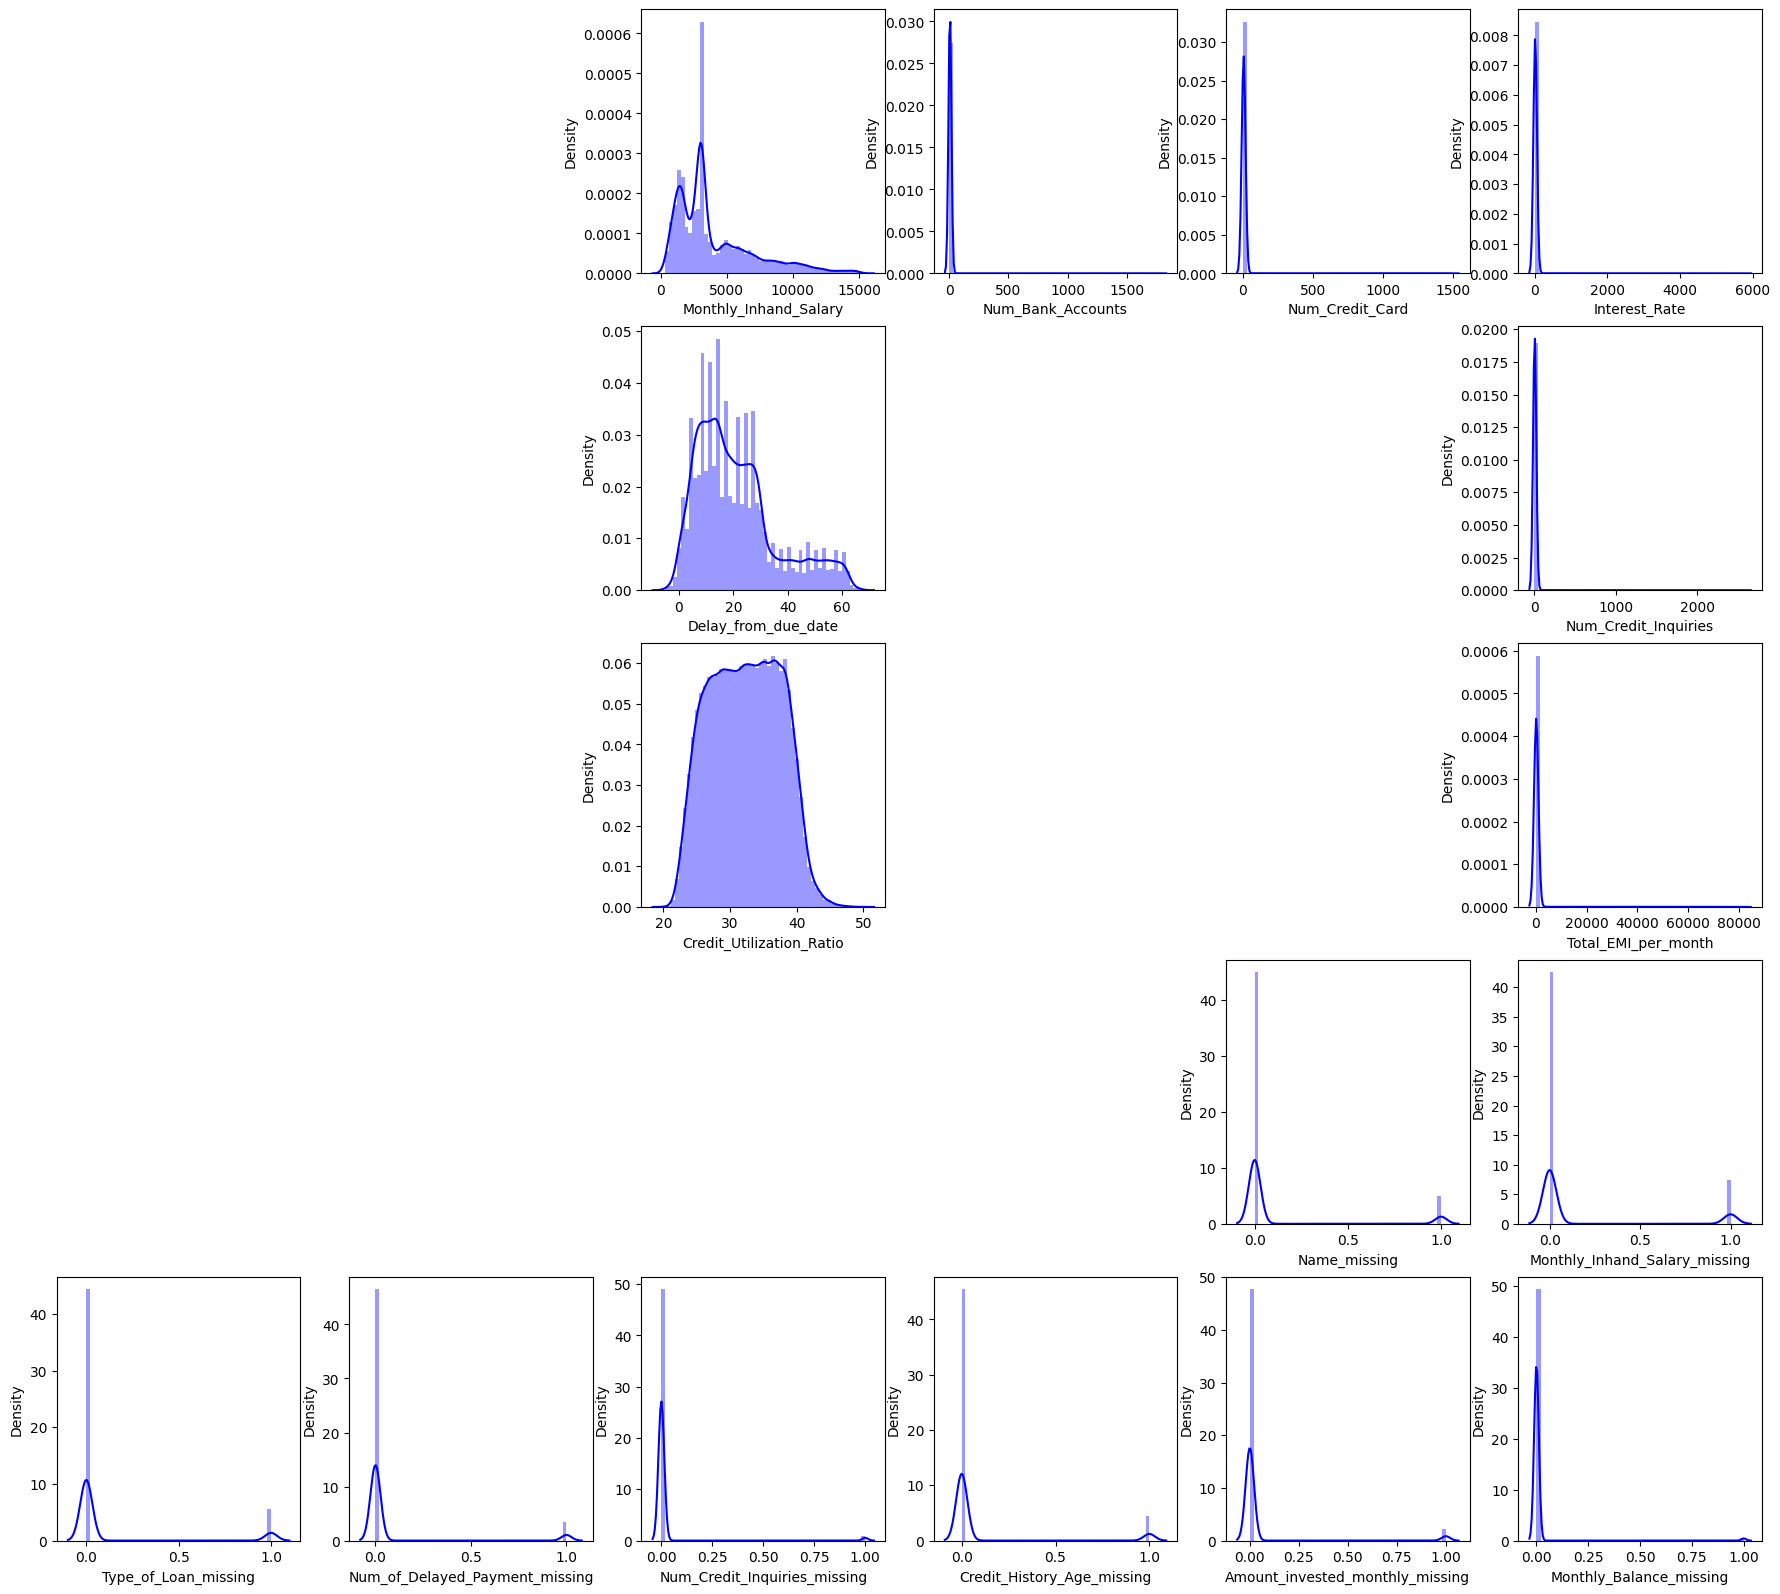

In [92]:
plt.figure(figsize=(22,24))
for i,col in enumerate(train_data):
    if train_data.loc[:,col].dtype !='object':
        plt.subplot(6,6,i+1)
        sns.distplot(train_data.loc[:,col].dropna(),kde=True,color='blue')

#### **Interpretation 🎯:**

* The distribution of **Delay_from_due_date** and **Monthly_Inhand_Salary** has bimodale, because it has two peaks. The distribution of the variables: Total_EMI_per_month,Num_Credit_Inquiries,Interest_Rate,Num_Credit_Card and Num_Bank_Accounts is skewed, we can confirme that using skew function.

In [93]:
num_col = train_data.select_dtypes(exclude=['object']).columns

In [94]:
skew = train_data[num_col].skew(skipna = True).sort_values(ascending=False)
skew

Num_Bank_Accounts                  11.242372
Num_Credit_Inquiries                9.930033
Interest_Rate                       9.058889
Monthly_Balance_missing             8.958836
Num_Credit_Card                     8.388141
Total_EMI_per_month                 7.132717
Num_Credit_Inquiries_missing        6.969028
Amount_invested_monthly_missing     4.399586
Num_of_Delayed_Payment_missing      3.391862
Credit_History_Age_missing          2.853392
Name_missing                        2.663918
Type_of_Loan_missing                2.449540
Monthly_Inhand_Salary_missing       1.963707
Monthly_Inhand_Salary               1.353099
Delay_from_due_date                 0.967946
Credit_Utilization_Ratio            0.024083
dtype: float64

#### **Interpretation: 🎯**

* As we can see all the skewness values are greater than 0, we can understand that our numerical features : Total_EMI_per_month,Num_Credit_Inquiries,Interest_Rate,Num_Credit_Card and Num_Bank_Accounts are right-skewed.

* we can say that these variables have outliers that skew the data. we tackle it now

In [95]:
print(clr.S+"No of Duplicates in categorical data : "+clr.E,cat_val[cat_val.duplicated()].sum().sum())

No of Duplicates in categorical data :  0.0


<AxesSubplot: title={'center': 'Checking the Counts of Credit Score'}>

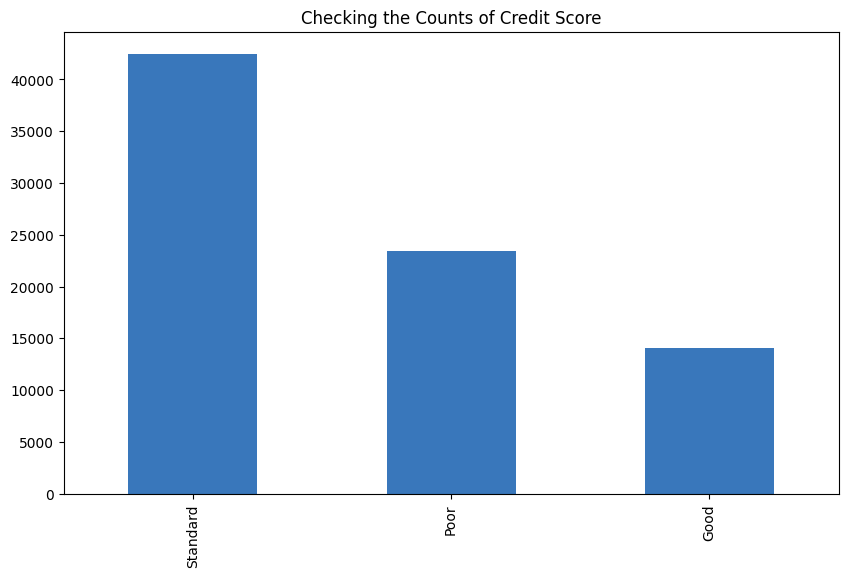

In [96]:
plt.figure(figsize=(10,6))
plt.title('Checking the Counts of Credit Score')
train_data['Credit_Score'].value_counts().plot(kind='bar',color=my_colors[2])

#### **Interpretation 🎯:**
* So we see that Good Type of Credit Score have less counts and Standard Have the most

In [97]:
#print categories of each categorical column
print(clr.S+"Cardinality of Categorical Features: "+clr.E)
for col in train_data.select_dtypes(exclude=['number']):
    print(f"{col:-<30},{train_data[col].unique()}")

Cardinality of Categorical Features: 
ID----------------------------,['0x1602' '0x1603' '0x1604' ... '0x1eaba' '0x1eabb' '0x1eabc']
Customer_ID-------------------,['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xae4f' 'CUS_0x900'
 'CUS_0x7753']
Month-------------------------,['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Name--------------------------,['Aaron Maashoh' 'Langep' 'Rick Rothackerj' ... 'Dailyg' 'Anna Ringstromv'
 'Lauren Taray']
Age---------------------------,['23' '-500' '28_' ... '2323' '1482' '4518']
SSN---------------------------,['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '373-92-0837' '173-70-3432'
 '517-82-1083']
Occupation--------------------,['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Annual_Income-----------------,['19114.12' '34847.84' '34847.84_' ... '16159.51' '16159.51_' '93589.48']
Num_of_Loan--

In [98]:
train_data.drop(['ID','Name','Age','Customer_ID','Occupation','Changed_Credit_Limit','Credit_Mix','SSN'],axis=1,inplace=True)
test_data.drop(['ID','Name','Age','Customer_ID','Occupation','Changed_Credit_Limit','Credit_Mix','SSN'],axis=1,inplace=True)

In [99]:
new_cat_col = train_data.select_dtypes(include=['object']).columns
new_cat_col

Index(['Month', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [100]:
def feature_extraction(df):
    year =[]
    month =[]

    for i,val in enumerate(df['Credit_History_Age']):
        x,x1,x2,x3,x4 = df.iloc[i]['Credit_History_Age'].split(' ',4)
        year.append(x)
        month.append(x3)
    df['credit_history_year'] = year
    df['credit_history_month'] = month

    df.drop('Credit_History_Age',axis=1,inplace=True)
    
    return df

In [101]:
train_data = feature_extraction(train_data)
test_data = feature_extraction(test_data)

In [102]:
train_data.head()

,Month,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Name_missing,Monthly_Inhand_Salary_missing,Type_of_Loan_missing,Num_of_Delayed_Payment_missing,Num_Credit_Inquiries_missing,Credit_History_Age_missing,Amount_invested_monthly_missing,Monthly_Balance_missing,credit_history_year,credit_history_month
0,January,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,...,0,0,0,0,0,0,0,0,22,1
1,February,19114.12,3068.576667,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,16,...,0,1,0,1,0,1,0,0,15,11
2,March,19114.12,3068.576667,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,...,0,1,0,0,0,0,0,0,22,3
3,April,19114.12,3068.576667,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,...,0,1,0,0,0,0,0,0,22,4
4,May,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,16,...,0,0,0,1,0,0,0,0,22,5


In [103]:
train_data[['credit_history_year','credit_history_month']] = train_data[['credit_history_year','credit_history_month']].astype('int')

test_data[['credit_history_year','credit_history_month']] = test_data[['credit_history_year','credit_history_month']].astype('int')

In [104]:
le = LabelEncoder()
train_data['Type_of_Loan'] = le.fit_transform(train_data['Type_of_Loan'])
test_data['Type_of_Loan'] = le.fit_transform(test_data['Type_of_Loan'])

In [105]:
mon = {
    'January':0,
    'February':1,
    'March':2, 
    'April':3,
    'May':4,
    'June':5,
    'July':6,
    'August':7
}

In [106]:
train_data['Month'].replace(mon,inplace=True)
test_data['Month'].replace(mon,inplace=True)

In [107]:
train_data.drop(['Annual_Income','Payment_Behaviour'],axis=1,inplace=True)
test_data.drop(['Annual_Income','Payment_Behaviour'],axis=1,inplace=True)

In [108]:
train_data.drop(['Num_of_Loan','Num_of_Delayed_Payment','Outstanding_Debt','Payment_of_Min_Amount','Amount_invested_monthly','Monthly_Balance'],axis=1,inplace=True)
test_data.drop(['Num_of_Loan','Num_of_Delayed_Payment','Outstanding_Debt','Payment_of_Min_Amount','Amount_invested_monthly','Monthly_Balance'],axis=1,inplace=True)

In [109]:
train_data['Credit_Score'] = le.fit_transform(train_data['Credit_Score'])

In [137]:
le.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

<AxesSubplot: >

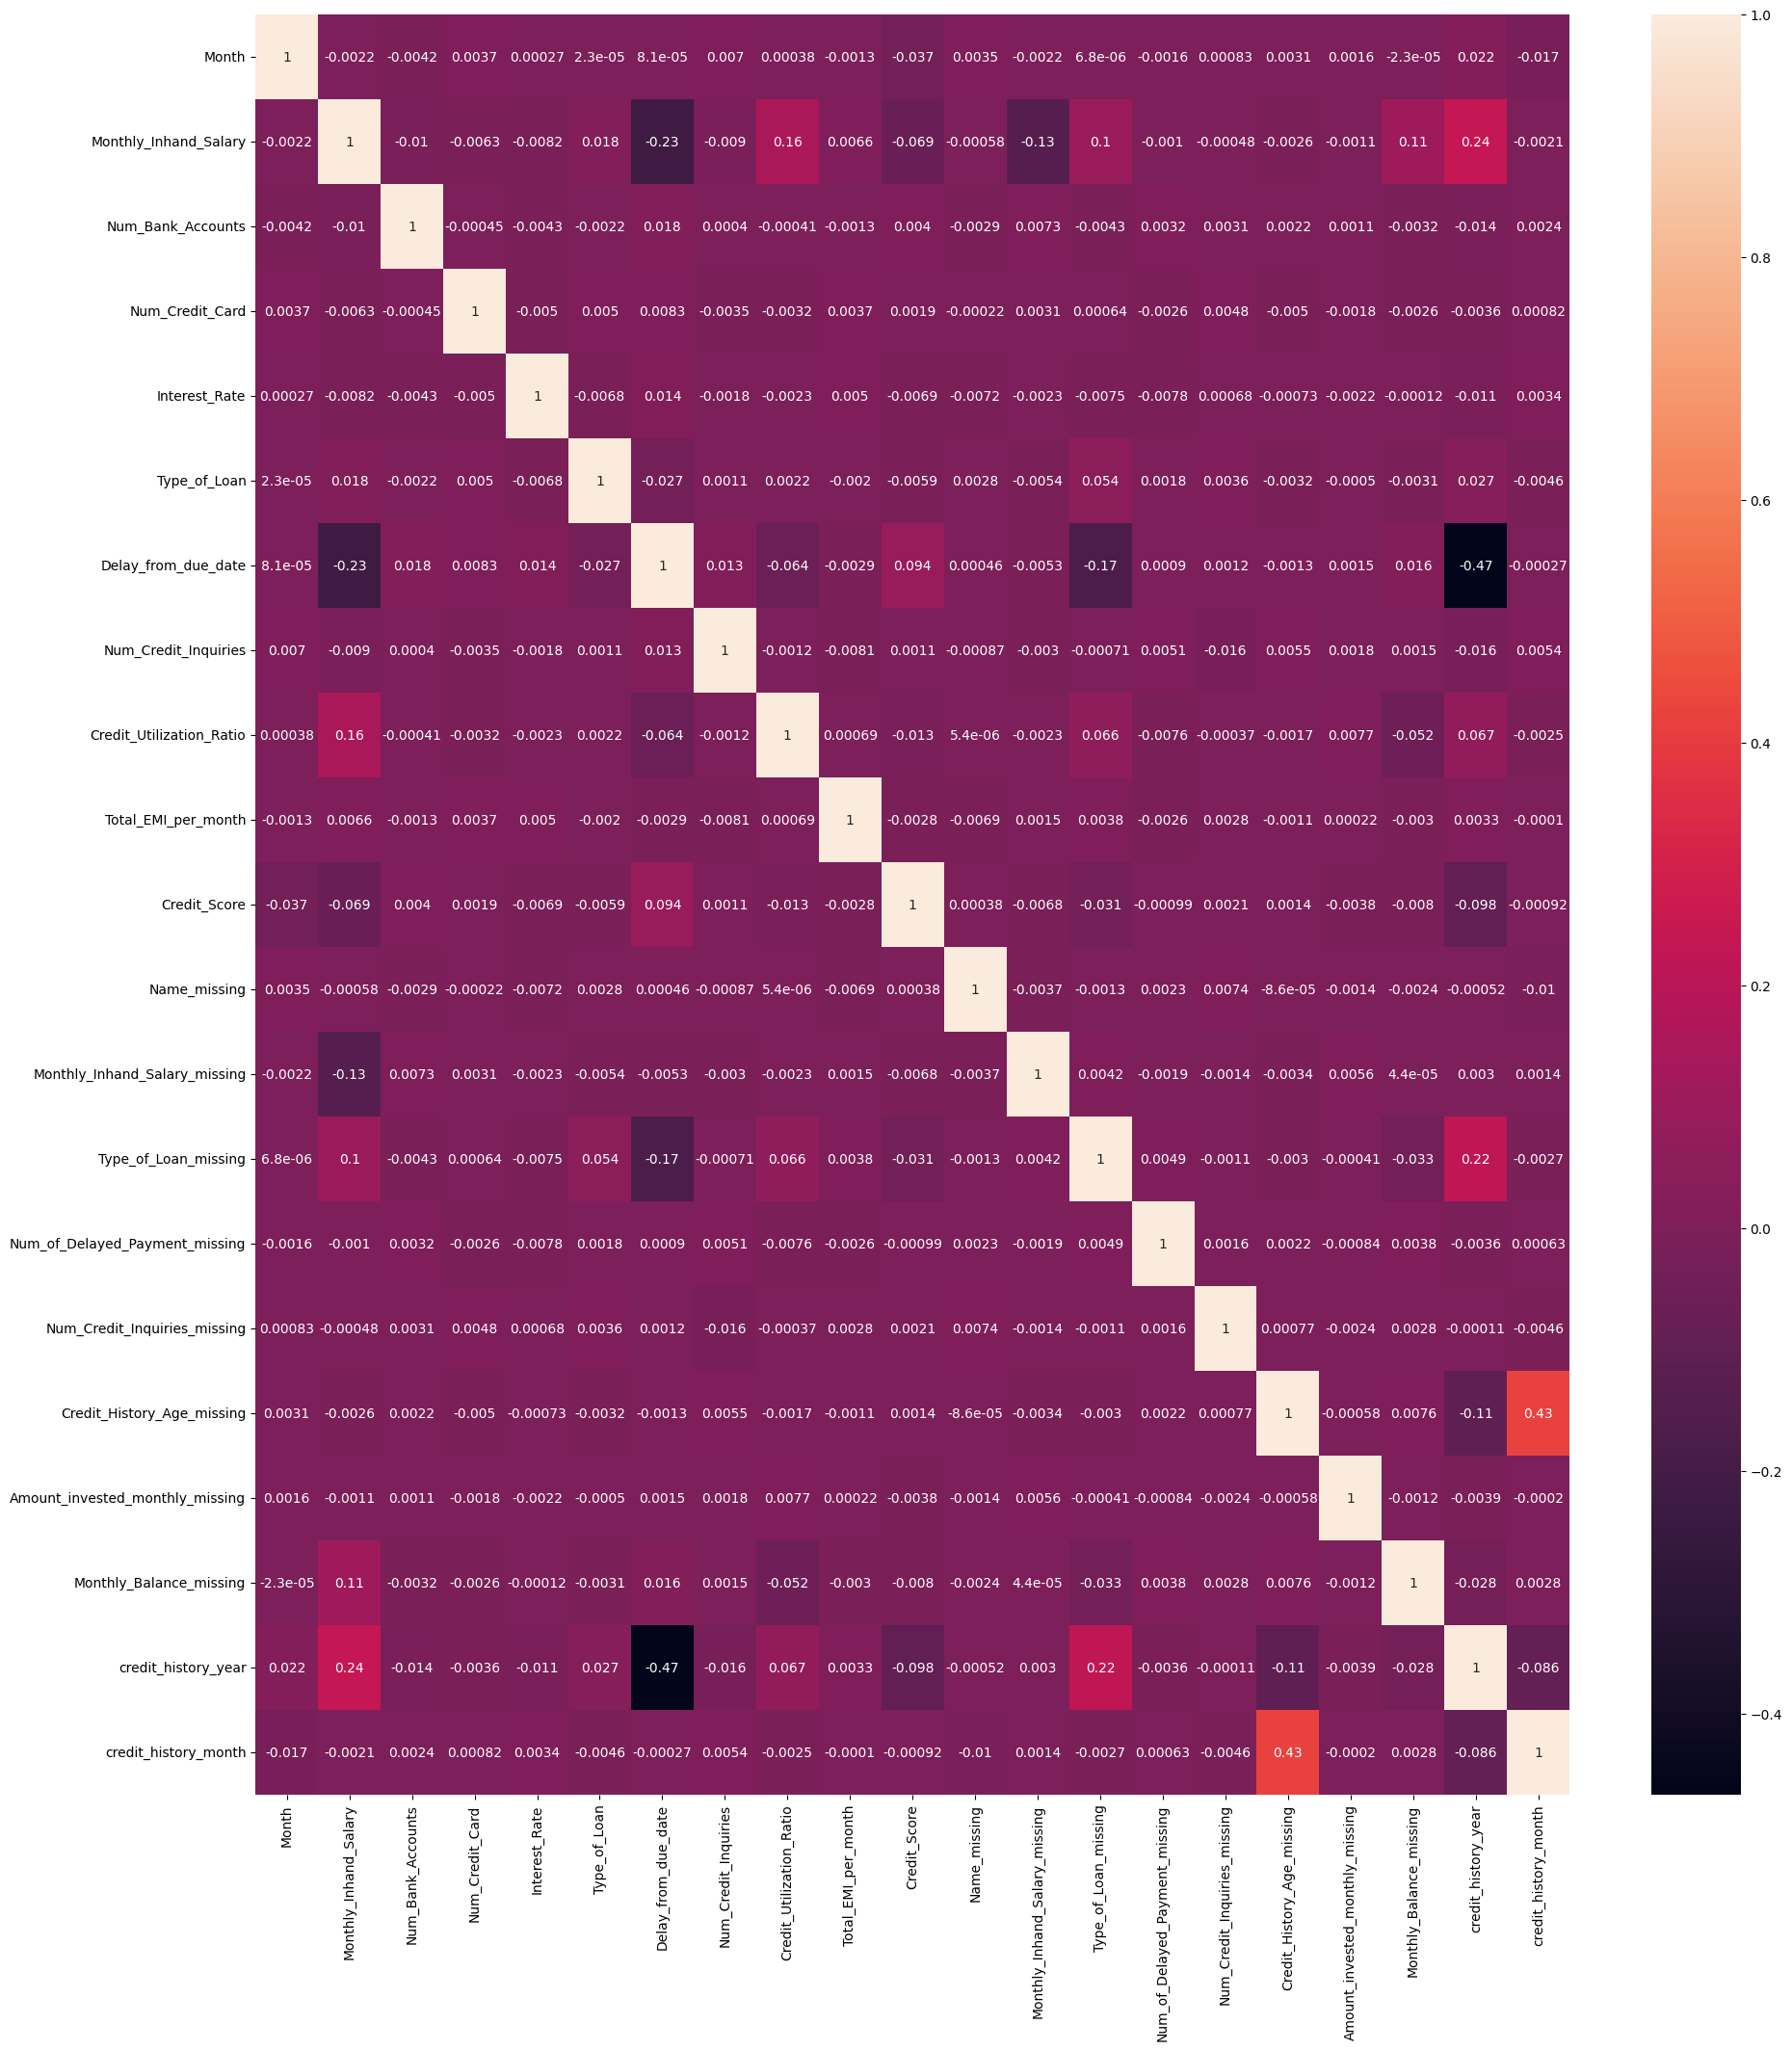

In [110]:
plt.figure(figsize=(22,24))
sns.heatmap(train_data.corr(), annot=True)

In [111]:
for col in train_data.columns:
    
    if train_data[col].dtypes !='object':
        first_quartile = train_data[col].quantile(0.25)
        third_quartile = train_data[col].quantile(0.75)
        
        IQR = third_quartile - first_quartile 
        
        out = third_quartile + 3*IQR
       
        train_data.drop(train_data[train_data[col] > out].index,axis=0,inplace=True)
    

In [112]:
X = train_data.drop(['Credit_Score'],axis=1)
Y = train_data.Credit_Score

In [124]:
score = []
fold_no =[]
def model(X,Y,folds):
    skf = StratifiedKFold(n_splits=folds,shuffle=True,random_state=0)
    for fold,(train_idx,test_idx) in enumerate(skf.split(X,Y)):
        train_X,val_X = X.iloc[train_idx],X.iloc[test_idx]
        train_y,val_y = Y.iloc[train_idx],Y.iloc[test_idx]
        
        clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3,grow_policy='depthwise',
              importance_type=None,
              learning_rate=0.05, max_bin=25, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15,n_estimators=100,
              verbosity=1)
        
        clf.fit(train_X,train_y)
        pred = clf.predict(val_X)
            
        score = f1_score(val_y, pred, average=None)
        fold_no.append(fold+1)
        
        print(f'fold no = {fold+1} and f1_score = ',score)
        
    return clf

In [125]:
clf = model(X,Y,5)

fold no = 1 and f1_score =  [0.7141569  0.78537295 0.80069025]
fold no = 2 and f1_score =  [0.73375451 0.79192676 0.80985222]
fold no = 3 and f1_score =  [0.72232305 0.78031561 0.79955676]
fold no = 4 and f1_score =  [0.72126697 0.79049587 0.80301532]
fold no = 5 and f1_score =  [0.73005858 0.78777801 0.80448718]


In [148]:
predictions = clf.predict(test_data)
t = pd.read_csv('/kaggle/input/developers-day-2023-data-science-competition/test.csv')
sub = pd.DataFrame()
sub['ID'] = t['ID']
sub['Expected'] = predictions

In [151]:
mon = {
    0:'Good',
    1:'Poor',
    2:'Standard'
}

sub['Expected'].replace(mon,inplace=True)

In [153]:
sub.to_csv('my_submission.csv',index=False)